In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve, train_test_split, KFold
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("adult_train.csv", header=None)#header为int指表示指定行作为显示的头

In [3]:
train.shape

(32561, 15)

In [4]:
train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [5]:
train.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation", 
    "relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]
column_names = train.columns
#打印列名
print(column_names)
#查看csv中？的个数
print(train['native-country'].isin([" ?"]).value_counts())
print(train['workclass'].isin([" ?"]).value_counts())

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
False    31978
True       583
Name: native-country, dtype: int64
False    30725
True      1836
Name: workclass, dtype: int64


In [6]:
for c in column_names:
    print(train[c].value_counts())

#将？替换
for c in column_names:
    train[c] = train[c].replace(" ?", np.NaN)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int6

In [7]:
print(train.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [8]:
train = train.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [9]:
#填充后的null 个数
print(train.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [10]:
#数据集的描述
train.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

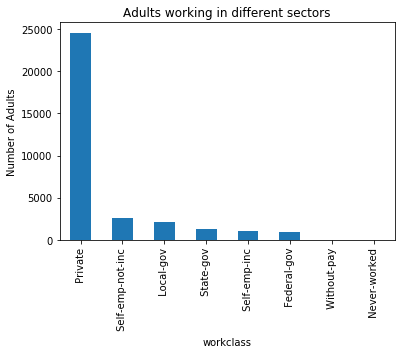

In [11]:
train['workclass'].value_counts().plot(kind = 'bar')
plt.title('Adults working in different sectors')
plt.ylabel('Number of Adults')
plt.xlabel('workclass')
plt.show()

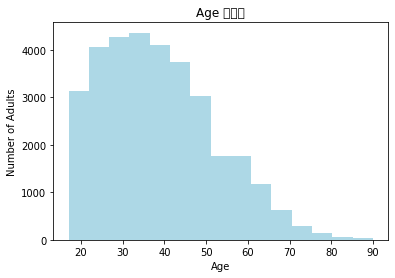

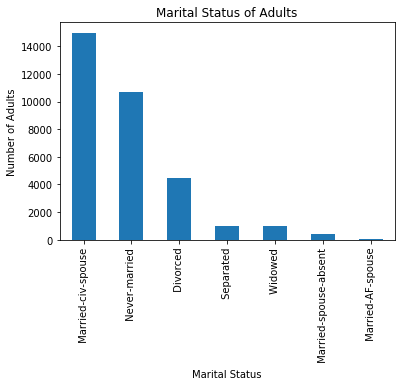

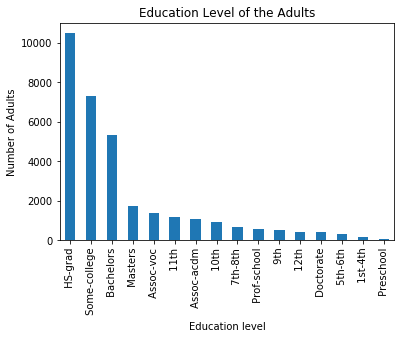

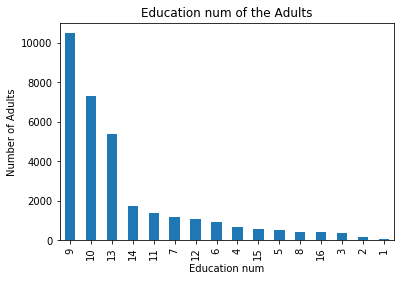

In [12]:
#Age图形化
train['age'].plot(kind = 'hist', color ='lightblue',bins = 15)
plt.title('Age 分布图')
plt.xlabel('Age')
plt.ylabel('Number of Adults')
plt.show()

#婚姻状态图
train['marital-status'].value_counts().plot(kind = 'bar')
plt.title('Marital Status of Adults')
plt.ylabel('Number of Adults')
plt.xlabel('Marital Status')
plt.show()

#Education
train['education'].value_counts().plot(kind = 'bar')
plt.title('Education Level of the Adults')
plt.ylabel('Number of Adults')
plt.xlabel('Education level')
plt.show()
#Education-num
train['education-num'].value_counts().plot(kind = 'bar')
plt.title('Education num of the Adults')
plt.ylabel('Number of Adults')
plt.xlabel('Education num')
plt.show()

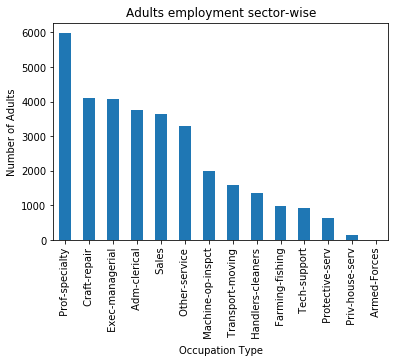

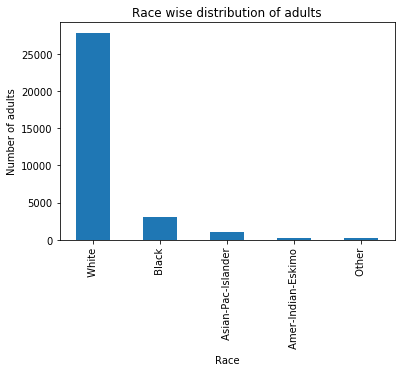

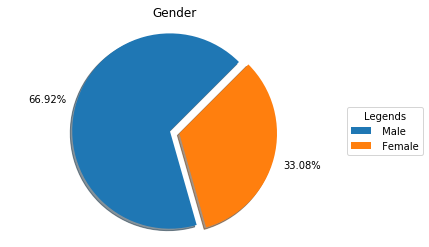

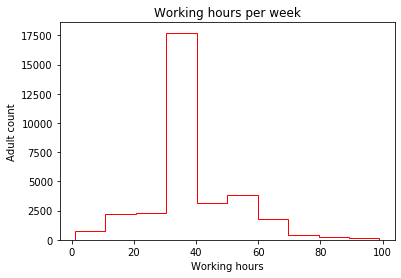

In [13]:
#Occupation
train['occupation'].value_counts().plot(kind = 'bar')
plt.title('Adults employment sector-wise')
plt.ylabel('Number of Adults')
plt.xlabel('Occupation Type')
plt.show()

# Race
train['race'].value_counts().plot(kind = 'bar')
plt.title('Race wise distribution of adults')
plt.ylabel('Number of adults')
plt.xlabel('Race')
plt.show()

# Sex
labels = train['sex'].unique()
sizes = train['sex'].value_counts()
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.2f%%', shadow=True, startangle=45, pctdistance=1.3, labeldistance=0)
ax1.axis('equal') 
ax1.legend(labels,
          title="Legends",
          loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("Gender")
plt.show()

# Week hours
train['hours-per-week'].plot(kind = 'hist', bins = 10,color ='red',histtype = 'step')
plt.title('Working hours per week')
plt.xlabel('Working hours')
plt.ylabel('Adult count')
plt.show()

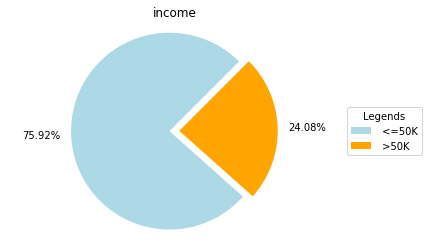

In [14]:
# Sex
labels = train['income'].unique()
sizes = train['income'].value_counts()
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.2f%%', shadow=False, startangle=45, pctdistance=1.3, labeldistance=0,colors = ('lightblue','orange'))
ax1.axis('equal') 
ax1.legend(labels,
          title="Legends",
          loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
ax1.set_title("income")
plt.show()

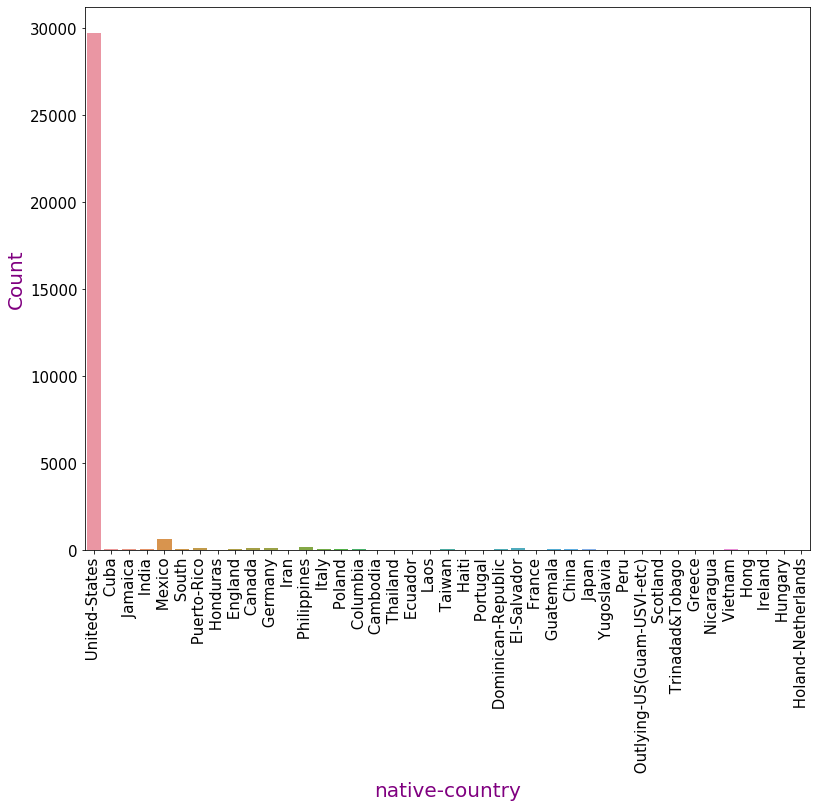

In [15]:
#Creating Pie Chart for Native Country
plt.figure(figsize=(13,10))
sns.countplot(x=train["native-country"],data=train)
plt.xlabel("native-country",color="purple",fontsize=20)
plt.ylabel("Count",color="purple",fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

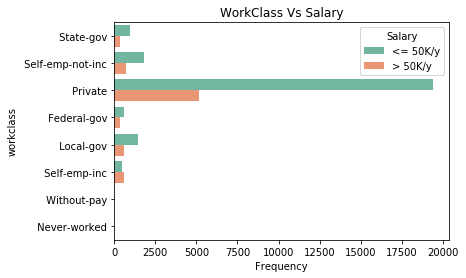

In [16]:
# find relationship between workclass and salary
graph1 = sns.countplot(y= "workclass", hue= "income", data= train, palette="Set2")
plt.legend(title = 'Salary', labels = ['<= 50K/y','> 50K/y'])
plt.title('WorkClass Vs Salary')
plt.xlabel('Frequency')
plt.show(graph1)

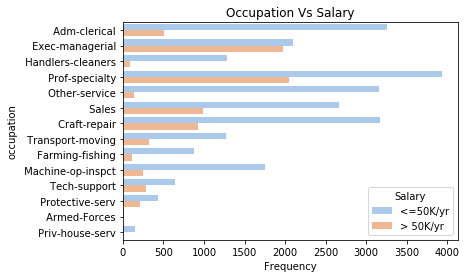

In [17]:
# find relationship between occupation and salary
graph2 = sns.countplot(y="occupation", hue="income", data= train, palette='pastel')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.title('Occupation Vs Salary')
plt.xlabel('Frequency')
plt.show(graph2)

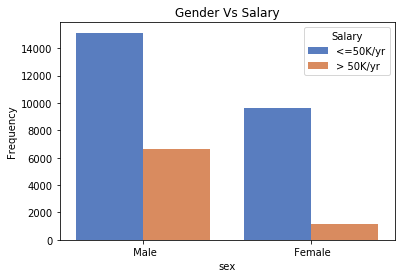

In [18]:
#find relationship between Sex and salary
graph4 = sns.countplot(x="sex", hue="income", data= train,palette='muted')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.title('Gender Vs Salary')
plt.ylabel('Frequency')
plt.show(graph4)

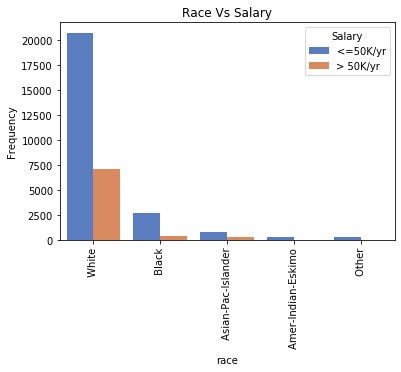

In [19]:
# find relationship between Race and salary
graph10 = sns.countplot(x="race", hue="income", data= train,palette='muted')
plt.legend(title = 'Salary', labels = ['<=50K/yr','> 50K/yr'])
plt.ylabel('Frequency')
plt.title('Race Vs Salary')
plt.xticks(rotation='vertical')
plt.show(graph10)

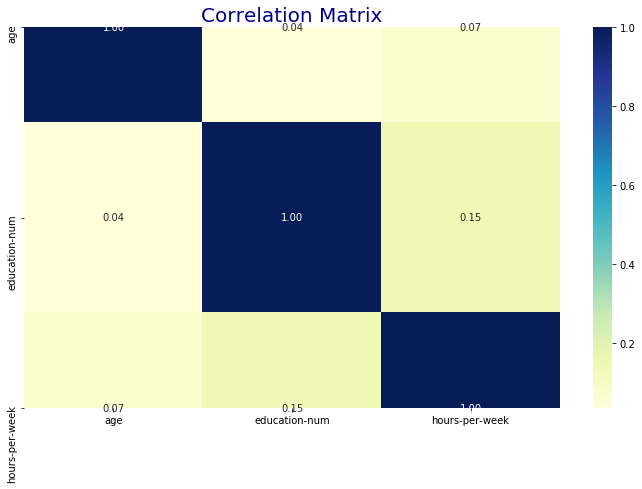

In [20]:
list=['age','education-num',"hours-per-week","occupation"]
plt.figure(figsize=(12,7))
sns.heatmap(train[list].corr(),annot=True, fmt = ".2f", cmap = "YlGnBu")
plt.title("Correlation Matrix",color="darkblue",fontsize=20)
plt.show()

In [21]:
def clean_data(dataset):
    dataset.columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income"]

    column_names = dataset.columns
    #替换？为空值
    for c in column_names:
        dataset[c] = dataset[c].replace(" ?", np.NaN)
    #空值填充
    dataset = dataset.apply(lambda x: x.fillna(x.value_counts().index[0]))

    
    column_names_str = ["workclass","education","marital-status","occupation", "relationship","race","sex","native-country","income"]

    #降维，将之归为两类
    dataset.replace([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'],
               [' not-married', ' married', ' not-married',
       ' married', ' not-married', ' married',
       ' not-married'], inplace=True)


    #进行one-hot编码 
    Workclass = pd.get_dummies(dataset['workclass'],drop_first=True)
    Education = pd.get_dummies(dataset['education'],drop_first=True)
    MaritalStatus = pd.get_dummies(dataset['marital-status'],drop_first=True)
    Occupation = pd.get_dummies(dataset['occupation'],drop_first=True)
    Relationship = pd.get_dummies(dataset['relationship'],drop_first=True)
    Race = pd.get_dummies(dataset['race'],drop_first=True)
    Sex = pd.get_dummies(dataset['sex'],drop_first=True)
    NativeCountry = pd.get_dummies(dataset['native-country'],drop_first=True)
    Income = pd.get_dummies(dataset['income'],drop_first=True)

    '''注意：凡是会对原数组作出修改并返回一个新数组的，往往都有一个 inplace可选参数。如果手动设定为True（默认为False），那么原数组直接就被替换。也就是说，采用inplace=True之后，原数组名（如2和3情况所示）对应的内存值直接改变；

而采用inplace=False之后，原数组名对应的内存值并不改变，需要将新的结果赋给一个新的数组或者覆盖原数组的内存位置（如1情况所示）。
'''
    dataset.drop(['workclass',
     'education',
     'marital-status',
     'occupation',
     'relationship',
     'race',
     'sex',
     'native-country',
     'income'], axis=1, inplace=True)
    from scipy.stats.mstats import winsorize
    dataset["age"]           = winsorize(dataset["age"],(0,0.15))
    dataset["fnlwgt"]        = winsorize(dataset["fnlwgt"],(0,0.15))
    dataset["capital-gain"]  = winsorize(dataset["capital-gain"],(0,0.099))
    dataset["capital-loss"]  = winsorize(dataset["capital-loss"],(0,0.099))
    dataset["hours-per-week"]= winsorize(dataset["hours-per-week"],(0.12,0.18))
    dataset = pd.concat([Workclass,Education,MaritalStatus,Occupation,Relationship,Race,Sex,NativeCountry,Income],axis=1)
    return dataset

In [22]:
train.head(10)

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3      Married-civ-spouse   Handlers-cleaners         Husband   Black   
4      Married-civ-spouse      Prof-specialty            Wife   Black   
5      Married-civ-spouse     Exec-managerial            Wife   White   
6   Married-spouse-absent       Other-service   Not-in-family   Black   
7      Married-civ-spouse     Exec-managerial         Husband   White   
8           Never-married      Prof-specialty   Not-in-family   White   
9      Married-civ-spouse     Exec-managerial         Husband   White   

       sex  capital-gain  capital-loss  hours-per-week  native-country  income  
0     Male          2174             0              40   United-States   <=50K  
1     Male             0             0              13   United-States   <=50K  
2     Male             0             0              40   United-States   <=50K  
3     Male             0             0              40   United-States   <=50K  
4   Female             0             0              40            Cuba   <=50K  
5   Female             0             0              40   United-States   <=50K  
6   Female             0             0              16         Jamaica   <=50K  
7     Male             0             0              45   United-States    >50K  
8   Female         14084             0              50   United-States    >50K  
9     Male          5178             0              40   United-States    >50K

In [23]:
column_name_str = ["workclass","education","marital-status","occupation", "relationship","race","sex","native-country","income"] 
#打印收入比例
# print(train['income'].value_counts()[0]/train.shape[0])#不超过50k人数比例)
# print(train['income'].value_counts()[1]/train.shape[0])#超过50k人数比例)
print(train)
#进行清洗
train=clean_data(train)
print(train.shape)
#继续删除不重要特征
train.drop([' Holand-Netherlands'], axis=1, inplace=True)

#train.drop([' Scotland'], axis=1, inplace=True)
#对测试数据集进行操作
test = pd.read_csv('adult_test.csv', header=None)
#数据清洗
test = clean_data(test)
#test.drop(' Scotland', axis=1, inplace=True)
print(train.keys())
print(train.shape)
print(test.keys())
test.columns = [' Local-gov', ' Never-worked', ' Private', ' Self-emp-inc',
   ' Self-emp-not-inc', ' State-gov', ' Without-pay', ' 11th', ' 12th',
   ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc',
   ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool',
   ' Prof-school', ' Some-college', ' not-married', ' Armed-Forces',
   ' Craft-repair', ' Exec-managerial', ' Farming-fishing',
   ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service',
   ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales',
   ' Tech-support', ' Transport-moving', ' Not-in-family',
   ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
   ' Asian-Pac-Islander', ' Black', ' Other', ' White', ' Male', ' Canada',
   ' China', ' Columbia', ' Cuba', ' Dominican-Republic', ' Ecuador',
   ' El-Salvador', ' England', ' France', ' Germany', ' Greece',
   ' Guatemala', ' Haiti', ' Honduras', ' Hong', ' Hungary', ' India',
   ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico',
   ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines',
   ' Poland', ' Portugal', ' Puerto-Rico', ' Scotland', ' South',
   ' Taiwan', ' Thailand', ' Trinadad&Tobago',' United-States',
   ' Vietnam', ' Yugoslavia', ' >50K']

X_train = train.drop(' >50K',axis=1)
X_test = test.drop(' >50K',axis=1)
y_train = train[' >50K']
y_test = test[' >50K']
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
kf = KFold(n_splits=10, shuffle=True, random_state=50)
classifiers = [
#CatBoostClassifier(learning_rate=0.08),
LogisticRegression(C=1,penalty="l2"),
LogisticRegressionCV(multi_class="ovr",solver="sag",cv=kf,tol=1e-5),
KNeighborsClassifier(n_neighbors=8), 
KNeighborsClassifier(n_neighbors=9),
KNeighborsClassifier(n_neighbors=7),
KNeighborsClassifier(n_neighbors=6),
LinearDiscriminantAnalysis(),
DecisionTreeClassifier(),
RandomForestClassifier(n_estimators = 10),
MLPClassifier(solver = 'lbfgs', alpha = 1e-5 , 
                hidden_layer_sizes = (15,10), random_state = 1),
SVC(),
GaussianNB()
]
#for _ in range(100):
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
    #X_train,y_train=_shuffle(X_train),_shuffle(y_train)
    #predict_model = LogisticRegressionCV(multi_class="ovr",solver="sag",cv=5,tol=1e-3)
    #使用多种普遍模型进行处理
#测试10次
bestaccuracy = 0
for _ in range(1): 
    print("第%d次"%_)
    kf = KFold(n_splits=10, shuffle=True, random_state=50)
    i = 0
    for model in classifiers:
        print("所采用的模型:" , model)
        predict_model = model
        predict_model.fit(X_train,y_train)

        predictions = predict_model.predict(X_test)
        a= accuracy_score(y_test, predictions)
        print("精确度",a)
        print(classification_report(y_test,predictions))
        print(confusion_matrix(y_test,predictions))
        if(a>bestaccuracy):
            bestaccuracy=a
            bestmodel = model
            bestprediction = predictions
            bestcfmatrix = confusion_matrix


       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

精确度 0.8307229285670413
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     12523
           1       0.64      0.60      0.62      3758

    accuracy                           0.83     16281
   macro avg       0.76      0.75      0.76     16281
weighted avg       0.83      0.83      0.83     16281

[[11255  1268]
 [ 1488  2270]]
所采用的模型: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
精确度 0.8285117621767705
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     12523
           1       0.68      0.48      0.57      3758

    accuracy                           0.83     16281
   macro avg       0.77      0.71      0.73     16281
weighted avg       0.82      0.83      0.82     16281

[[11671   852]
 [ 1940  1818]]
所采用的模型: LinearDiscriminantAnalysis(n_compon

### 结论，得出线性回归模型准确度最高，采用它

[[11749   774]
 [ 1624  2134]] 最好的模型是 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 精确度为: 0.8527117498925127


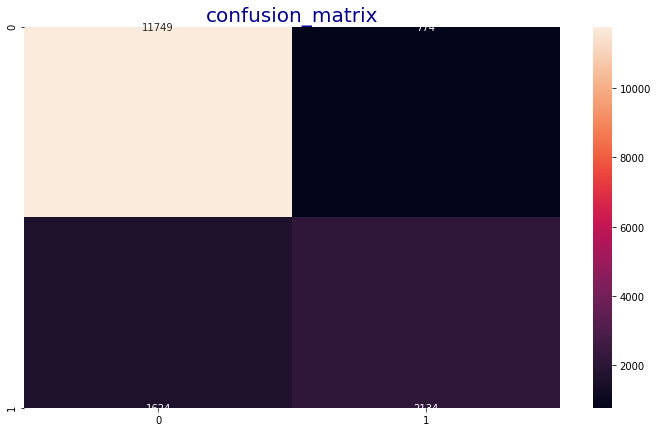

In [25]:
print(confusion_matrix(y_test,bestprediction),"最好的模型是",bestmodel,"精确度为:",bestaccuracy)
plt.figure(figsize=(12,7))
sns.heatmap(confusion_matrix(y_test,bestprediction), annot=True, fmt='g')
plt.title("confusion_matrix",color="darkblue",fontsize=20)
plt.show()
